# Stress Detection in Working Environments Using Physiological Sensors

### Ilyass El Mansouri - Sajeevan Puvikaran - Belkacem Zehani - Salim Tabarani - Yanis Daci 

## Business Introduction

#### Background definition
The challenge nature of the global economy and the use of advanced technologies have changed the way we work. This has resulted in an increase workload, it has become a problem in many organizations, where employees have encountered psychological problems related to work stress. In particular, stress has been high in North America, where 55% of the population has reported that work-related stress had an impact on their physical and mental health. 
<br/>

<br/>
It has been proven that work-related stress engander disease activation. Several studies have shown that stress can lead to several negative health effects, such as high blood pressure, lack of sleep, susceptibility to infections, and cardiovascular disease. All these situations result to musculoskeletal diseases, immunological problems and mental health problems such as anxiety and depressive disorders. We noticed for example in the studies of European Foundation for the Improvement of Living and Working Conditions that a decline in physical and mental health due to work-related stress leads to a decrease in the performance and overall productivity of organizations and increased cost in terms of absenteeism.
<br/>

#### Business Need
<br/>
Considering detrimental effects of prolonged exposure to stress both for employees and organizations, there is a clear need for a system to regularily monitor the well-being of workers and act when levels of stress are too high in the overall ecosystem. In order to do this, we consider ourselves in the case of a company that is concerned about the well-being of its employees and offers annual medical check-ups in which they monitor a daily life of some of their employees. If daily stress levels are alarming, she will take the necessary steps to address them.
<br/>

## Introducing the Data : WESAD

In everyday language, stress typically indicates strain caused by physical or psychological pressures at work, at school, or in personal life as well as by one’s environment. From this point of view, stress can be seen as a defensive process to protect oneself from potential injury and threats to emotional well-being. Thus, it is not surprising that stress is related to the capacity to adapt and respond to various circumstances.
<br/>

<table>
    <tr>
    <td>
        <img id ='im1' src='stressometer.png' width="300" >
    </td>
    </tr>
</table>

In October 2018, a group of researchers introduced a WEarable Stress and Affect Detection (WESAD) dataset that provides a multimodal high-quality dataset with various affective states. The experiment tested for three affective states amusement, stress, and neutral. It also could help determine whether a test subject was or was not stressed. 
<br/>

The WESAD dataset was composed after a stress test that was performed on to twelve males and three females. To collect their data, they used both a chest and a wrist-worn devices: a RespiBAN Professional2 and an Empatica E4. 
<br/>
The RespiBAN itself is equipped with sensors to measure accelerometer and respiratory data. All signals were sampled at 700 Hz.
<br/>
All subjects wore the Empatica E4 on their non-dominant hand. The Empatica E4 recorded blood volume pulse at 64Hz, temperature at 4Hz, and electrodermal activity at 4Hz.
<br/>

<table>
    <tr>
    <td>
        <img id ='im1' src='ima_appareil.png' width="500" >
    </td>
    </tr>
</table>

In addition, the subjects were asked to follow a guided meditation in order to de-excite them after the stress and amusement conditions. After the subjects had been equipped with the sensors, a 20 minute baseline test was recorded. During the baseline, the subjects were asked to sit or stand at a table. After the baseline condition results were recorded, there was an amusement condition test. During the amusement condition, the subjects watched a set of eleven funny video clips. In total, the amusement condition had a length of 392 seconds.
<br/>
At the end of the protocol, the sensors were again synchronised via a double tap gesture. In total, the study had a duration of about two hours.

Raw sensor data was recorded with two devices: a chest-worn device (RespiBAN) and a wrist-worn device (Empatica E4). 



#### RespiBAN :

In order to convert the raw sensor values into SI units, each channel has to transformed based on the formulas given below (signal contains the raw sensor values, $vcc=3$, $\text{chan_bit}=2^{16}$).
- <b>ECG (mV):</b> $$(\frac{\text{signal}}{\text{chan_bit}}-0.5)*vcc$$
- <b>EDA (μS):</b> $$\frac{\frac{\text{signal}}{\text{chan_bit}}*vcc}{0.12}$$   
- <b>EMG (mV):</b> $$\frac{\text{signal}}{\text{chan_bit}}*vcc$$
- <b>TEMP (°C):</b>
$$v_{out} = \frac{\text{signal}*vcc}{\text{chan_bit}-1.}$$
$$rntc = \frac{(10^4)*v_{out}}{vcc-vout}- 273.15 + \frac{1}{1.12*10^{-3}} + 2.34*10^{-4}*\log(rntc)+ 8.77*10^{-8}*\log(rntc)^3$$
- <b>XYZ (g):</b> $$\frac{\text{signal}-C_{min}}{C_{max}-C_{min}}*2-1$$ Where $C_{min} = 28000$ and $C_{max} = 38000$


- <b>RESPIRATION (%):</b> $$\frac{\text{signal}} {\text{chan_bit} - 0.5} * 100$$

#### Empatic E4 :

The E4 device was worn on the subjects’ non-dominant wrist, The double-tap signal pattern was used to manually synchronise the two devices’ raw data.

The double-tap signal pattern was used to manually synchronise the two devices’ raw data. The result is provided in the files SX.pkl, one file per subject. This file is a dictionary, with the following keys:
- subject: SX, the subject ID
- signal: includes all the raw data, in two fields:
    - Chest: RespiBAN data (all the modalities: ACC, ECG, EDA, EMG, RESP, TEMP)
    - Wrist : EmpaticaE4data(allthemodalities:ACC, BVP, EDA, TEMP)
- label : ID of the respective study protocol condition, sampled at 700 Hz. The following IDs
are provided: 0 = not defined / transient, 1 = baseline, 2 = stress, 3 = amusement, 4 = meditation

## Exploring the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
agg_data = pd.read_csv(r"SUBJECTS_TEST_Data.csv", sep=',', encoding="utf-8", error_bad_lines=False, low_memory = False)

In [4]:
agg_data.head()

,ECG,EMG,RESP,Chest_EDA,Wrist_ACC_X,Wrist_ACC_Y,Wrist_ACC_Z,Wrist_EDA,BVP,TEMP,SUBJECT,Label,Sample,GROUP_FREQ
0,0.021423,-0.004440,-1.148987,5.250549,62.000000,-21.000000,107.000000,1.138257,-59.370000,35.410000,S2,0,1,1
1,0.020325,0.004349,-1.124573,5.267334,62.307282,-21.156211,109.270362,1.142849,-63.580766,35.414642,S2,0,2,1
2,0.016525,0.005173,-1.152039,5.243301,62.639848,-21.033768,111.011770,1.147382,-66.580843,35.419221,S2,0,3,1
3,0.016708,0.007187,-1.158142,5.249405,62.995836,-20.638036,112.206895,1.151857,-68.365462,35.423735,S2,0,4,1
4,0.011673,-0.015152,-1.161194,5.286407,63.372326,-19.977788,112.844950,1.156272,-68.985094,35.428185,S2,0,5,1


In [5]:
agg_data = agg_data.drop(columns=['SUBJECT'])

agg_data= agg_data.drop(columns=['Sample', 'GROUP_FREQ'])
noise = np.random.randn(agg_data.loc[:, agg_data.columns != 'Label'].shape[0], agg_data.loc[:, agg_data.columns != 'Label'].shape[1])
agg_data.loc[:, agg_data.columns != 'Label'] +=0.5* noise

In [6]:
agg_data.head()

,ECG,EMG,RESP,Chest_EDA,Wrist_ACC_X,Wrist_ACC_Y,Wrist_ACC_Z,Wrist_EDA,BVP,TEMP,Label
0,-0.247080,-0.173792,-1.088209,5.387747,62.746137,-20.949490,106.499418,1.354975,-59.635816,34.780352,0
1,-0.382739,-0.398774,-1.389324,4.522395,62.388159,-21.291887,108.953713,1.007466,-63.223786,34.501627,0
2,-0.307793,0.173916,-1.374138,4.946308,62.382889,-20.966188,111.045078,1.496412,-66.791648,35.679333,0
3,0.022694,-0.358901,-0.534784,6.125421,62.452250,-21.519315,112.895206,1.372538,-67.120153,35.733719,0
4,0.618891,0.153269,-1.501290,4.744347,62.948604,-19.705994,113.172424,1.805765,-69.140813,35.810872,0


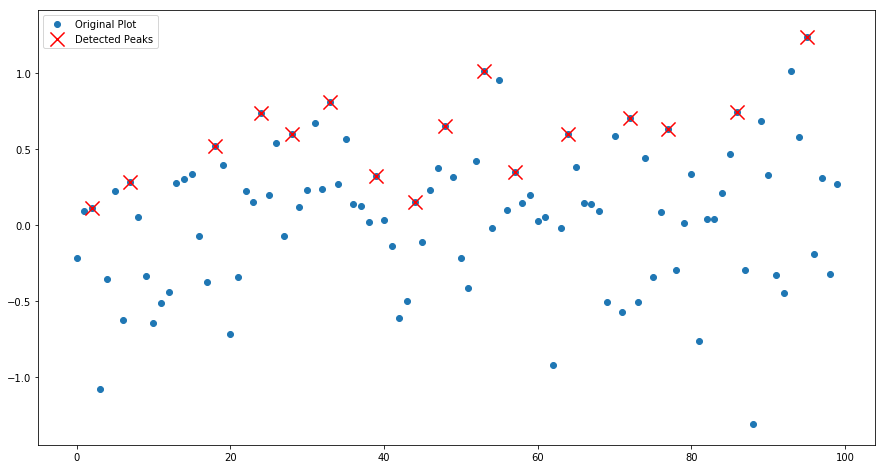

In [7]:
import peakutils

time_series = agg_data['ECG'][10:110]
cb = np.array(time_series)
indices = peakutils.indexes(cb, thres=-1.499996, min_dist=3)

plt.figure(figsize=(15,8))
plt.scatter(x=range(len(time_series)), y=time_series)

plt.scatter(x=indices, y=[np.array(time_series)[j] for j in indices], marker='x', c='red', s=200)
plt.legend(('Original Plot', 'Detected Peaks'))
plt.show()

In [8]:
# Get labels
labels = agg_data["Label"]
baseline = np.asarray([idx for idx,val in enumerate(labels) if val == 1])
stress = np.asarray([idx for idx,val in enumerate(labels) if val == 2])
amusement = np.asarray([idx for idx,val in enumerate(labels) if val == 3])

#print(baseline)

print("Baseline:", agg_data['ECG'][baseline].shape)
print("Stress:", agg_data['ECG'][stress].shape)
print("Amusement:", agg_data['ECG'][amusement].shape)

Baseline: (800800,)
Stress: (430500,)
Amusement: (253400,)


In [9]:
print ("Total dataset", agg_data['ECG'][baseline].shape[0]+agg_data['ECG'][stress].shape[0] + agg_data['ECG'][amusement].shape[0] )

Total dataset 1484700


In [10]:
l = ['ECG', 'Chest_EDA', 'EMG', 'RESP', 'TEMP']
temp = {}
for i in range(len(l)):
    temp[l[i]] = agg_data[l[i]][baseline].values.flatten()
df = pd.DataFrame(temp)

In [16]:
df["RESP"].head()

0    1.254267
1    0.750262
2    1.302089
3    1.456155
4    1.400827
Name: RESP, dtype: float64

In [28]:
import neurokit as nk
import seaborn as sns

bio = nk.bio_process(rsp=df["RESP"].head(100000), eda=df["Chest_EDA"].head(100000), sampling_rate=700)

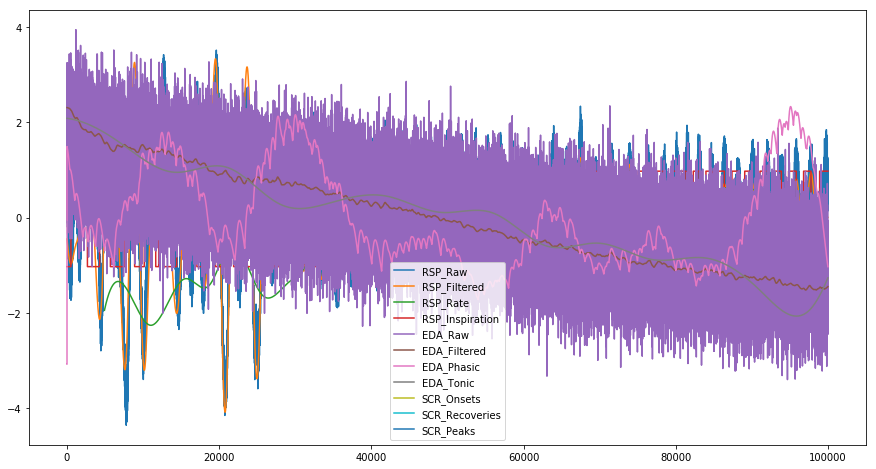

In [29]:
nk.z_score(bio["df"]).plot(figsize=(15,8))

In [30]:
bio = nk.bio_process(eda=df["Chest_EDA"].head(100000), sampling_rate=700)

In [31]:
res_bio = nk.z_score(bio["df"])

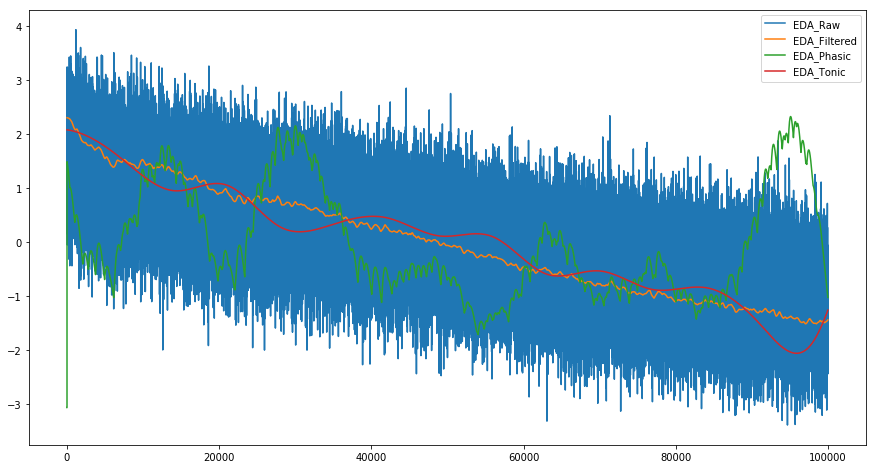

In [32]:
res_bio.plot(y=["EDA_Raw", 'EDA_Filtered', 'EDA_Phasic', 'EDA_Tonic'], figsize=(15,8))

In [33]:
del bio
del res_bio

#### Testing data

In [34]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(agg_data.loc[:, agg_data.columns != 'Label'],
                                                                    agg_data["Label"],
                                                                    test_size=0.33, random_state=42)

In [35]:
test=pd.concat([data_test,labels_test],axis=1)
train=pd.concat([data_train,labels_train],axis=1)

In [36]:
test.to_csv('data/test.csv')
train.to_csv('data/train.csv')

In [37]:
del agg_data

## Workflow

<img src="Workflow.PNG">

### The model to submit

The submission consists of two files: `feature_extractor.py` which defines a `FeatureExtractor` class, and `classifier.py` which defines a `Classifier` class

- `FeatureExtractor` can (optionally) hold code to calculate and add additional features.
- `Classifier` fits the model and predicts on (new) data, as outputted by the `FeatureExtractor`. The prediction should be in the form of a (n_samples, 5) array with the probabilities of the 5 classes.

---

An example `FeatureExtractor`, adding an additional feature based on a moving window to include some time-aware features:

In [38]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_new = X_df.copy()
        X_df_new = compute_rolling_mean(X_df_new, 'Wrist_ACC_X', '5')
        return X_df_new


def compute_rolling_mean(data, feature, row_window):
    name = '_'.join([feature, row_window, 'mean'])
    data[name] = data[feature].rolling(int(row_window)).mean()
    data[name] = data[name].ffill().bfill()
    data[name].astype(data[feature].dtype)
    return data


And an example `Classifier` doing a standard scaling and Logistic regression for the classification:

In [39]:
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


class Classifier(BaseEstimator):
    def __init__(self):
        self.model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

Using thus model interactively in the notebook to fit on the training data and predict for the testing data:

In [40]:
from sklearn.pipeline import make_pipeline

In [41]:
model = make_pipeline(FeatureExtractor(), Classifier())

In [42]:
model.fit(data_train, labels_train)

Pipeline(memory=None,
     steps=[('featureextractor', FeatureExtractor()), ('classifier', Classifier())])

In [43]:
y_pred = model.predict(data_test)

In [44]:
y_pred.shape

(1374450,)

In [47]:
y_pred

array([2, 0, 3, ..., 4, 0, 3], dtype=int64)

### Evaluation

Evaluating it on the individual points, we use the predicion, the recall and the F1-score:

In [48]:
from sklearn.metrics import f1_score, classification_report

In [50]:
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    707930
           1       0.96      0.96      0.96    264291
           2       0.89      0.89      0.89    141472
           3       0.92      0.92      0.92     83882
           4       0.95      0.94      0.95    176875

   micro avg       0.94      0.94      0.94   1374450
   macro avg       0.93      0.93      0.93   1374450
weighted avg       0.94      0.94      0.94   1374450



In [29]:
!ramp_test_submission --submission=starting_kit

^C
